In [1]:
print("Start")

Start


In [2]:
!pip install pydicom

In [2]:
%matplotlib inline
import scipy as Sci
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter # Adds Gausian Filter to reduce Nosie
import os #Obtain the Current Directory

current_directory = os.getcwd()
print(current_directory)



/Users/ibrahim/Desktop/BrainMRI


Text(0.5, 1.0, 'No Tumor Image')

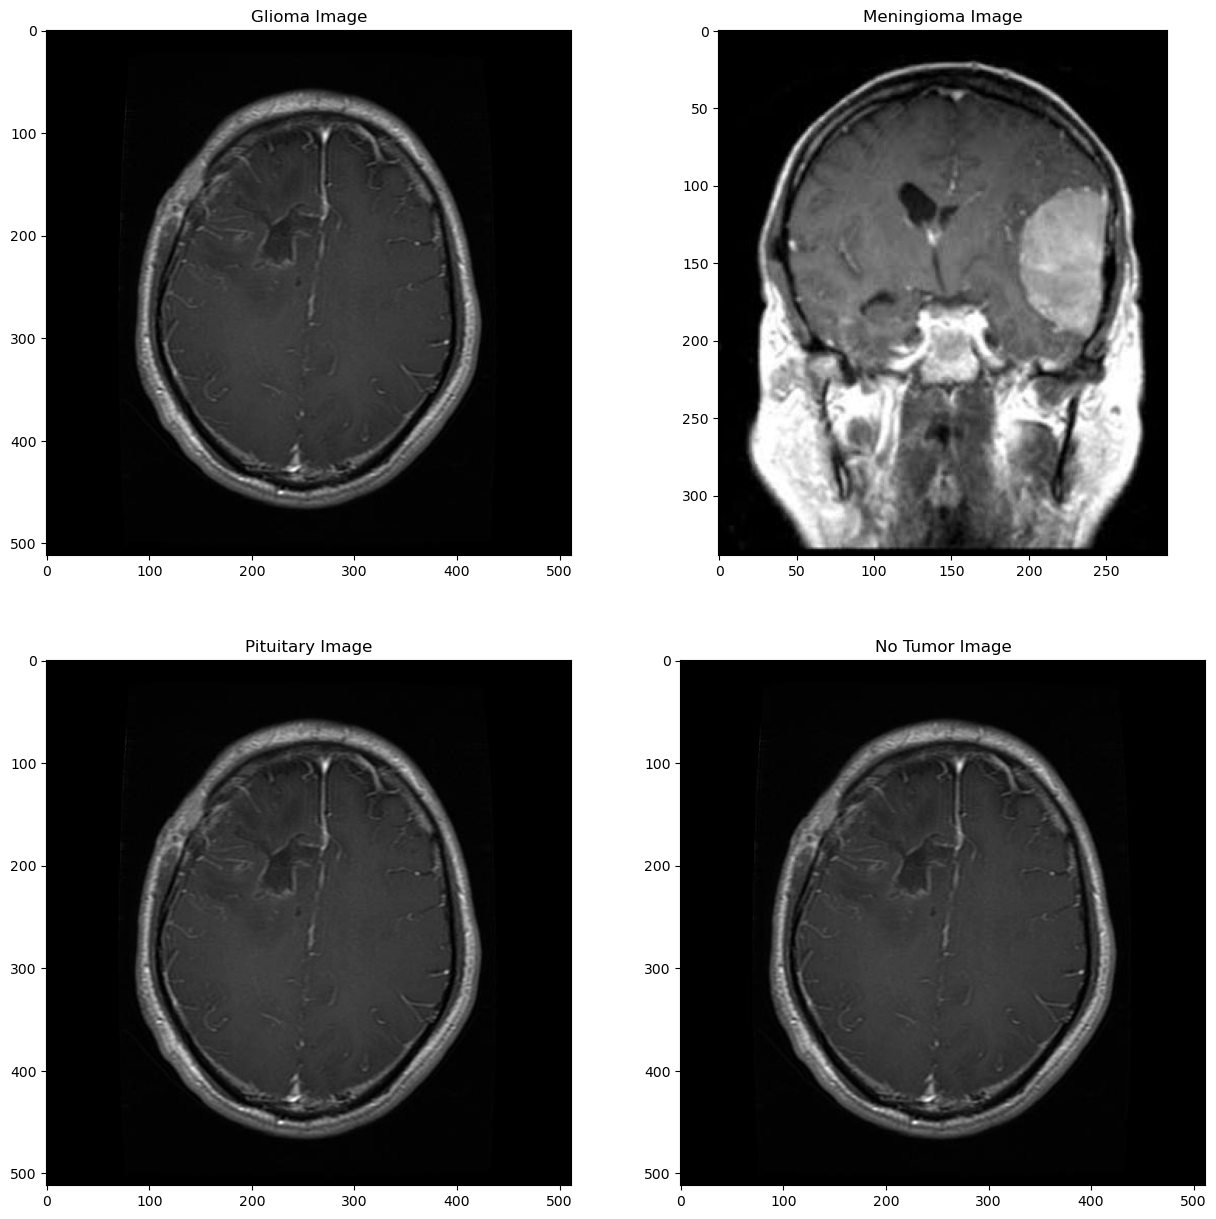

In [4]:
plt.figure(figsize=(15, 15))

image_glioma = Image.open('Data/Testing/glioma/Te-gl_0016.jpg').convert("L")
plt.subplot(2, 2, 1)
plt.imshow(image_glioma, cmap='gray')
plt.title("Glioma Image")

image_meningioma = Image.open('Data/Testing/meningioma/Te-me_0016.jpg').convert("L")
plt.subplot(2, 2, 2)
plt.imshow(image_meningioma, cmap='gray')
plt.title("Meningioma Image")

image_pituitary = Image.open('Data/Testing/pituitary/Te-pi_0016.jpg').convert("L")
plt.subplot(2, 2, 3)
plt.imshow(image_glioma, cmap='gray')
plt.title("Pituitary Image")

image = Image.open('Data/Testing/notumor/Te-no_0016.jpg').convert("L")
plt.subplot(2, 2, 4)
plt.imshow(image_glioma, cmap='gray')
plt.title("No Tumor Image")


In [4]:
# image = Image.open('Data/Testing/notumor/Te-no_0010.jpg').convert("L")
image = Image.open('Data/Testing/glioma/Te-gl_0016.jpg').convert("L")

Text(0.5, 1.0, 'Original Segmentation Image')

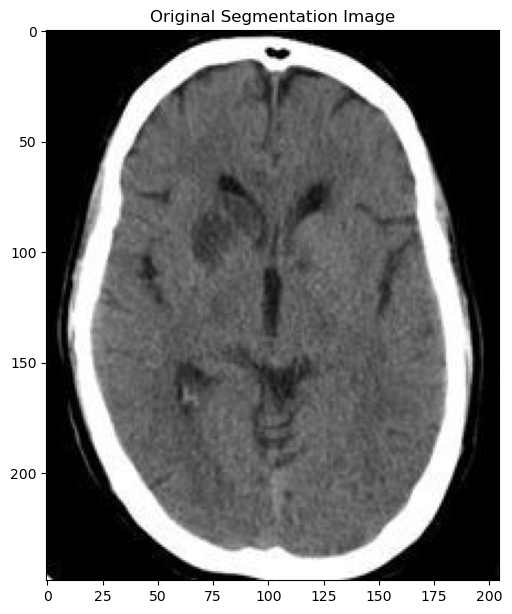

In [5]:
plt.figure(figsize=(50, 50))

plt.subplot(6,1,1); plt.imshow(image, cmap = 'gray')
plt.title("Original Segmentation Image")

In [6]:
# Noise Reduction
# Histogram
# Contrast Streching 
# Normalization
# Gaussian Filter
# Detect low-frequency noise
# CNN Model


Text(0.5, 1.0, 'Image Smoothed Image')

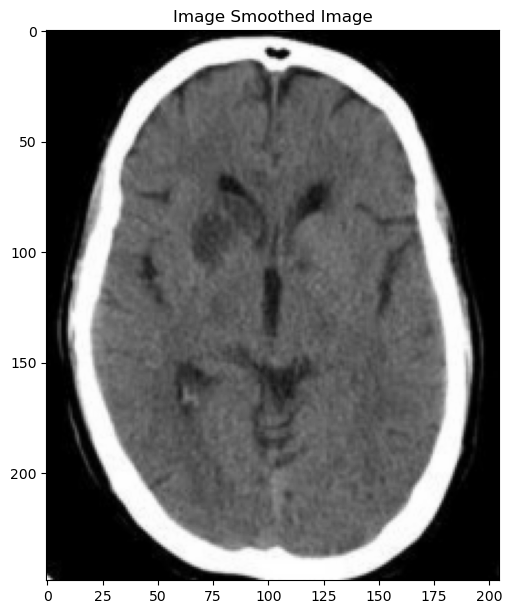

In [7]:
# The Sigma Controls the blurness of the image which reduces the noise
image_smoothed = gaussian_filter(image, sigma=0.5) 

plt.figure(figsize=(50, 50))

plt.subplot(6,1,1); plt.imshow(image_smoothed, cmap = 'gray')
plt.title("Image Smoothed Image")

(0.0, 4096.0)

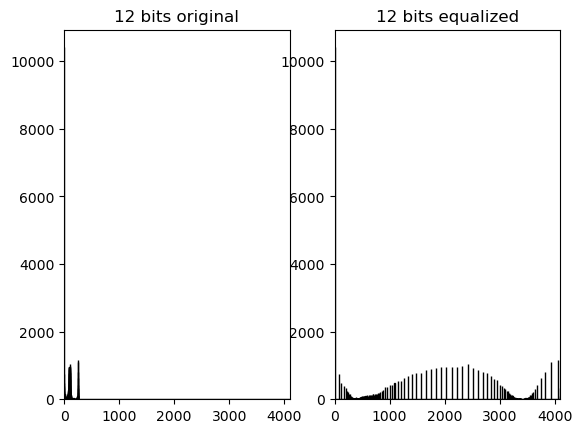

In [8]:
# Histogram
'''
Once we have the image smoothed we can then utilize the Histogram, the histogram is the distribution curve.
We can count the number of pixels at each of the values or bins available depending on the bits. With an N-bit
encoded image we have  bins available. The histogram is therefore a distribution of discrete intensity levels in
the range [0,]. And this distribution is a discrete function that associates each intensity level to the the
number of pixel with this intensity.
'''


# This uses numpy to generate a histogram
Im = image_smoothed
# 2^12 for the number of bins
hist,bins = np.histogram(Im.flatten(),4096,[0,4096])

cdf = hist.cumsum()         

cdf = (cdf - cdf.min())*4096/(cdf.max()-cdf.min())         
# cdf = (cdf - cdf.min())*512/(cdf.max()-cdf.min())         
cdf = np.ma.filled(cdf,0).astype('uint16')                 

Im2 = cdf[Im]       

# And we plot the histogram before and after equalization
plt.subplot(121)
plt.hist(Im.flatten(), 4096, [0,4096], fc='k', ec='k')
plt.title('12 bits original')
plt.xlim([0,4096])
plt.subplot(122)
plt.hist(Im2.flatten(), 4096, [0,4096], fc='k', ec='k')
plt.title('12 bits equalized')
plt.xlim([0,4096])

Text(0.5, 1.0, 'Image Smoothed Image')

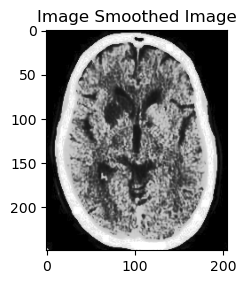

In [9]:
plt.figure(figsize=(20, 20))
plt.subplot(6,1,1); plt.imshow(Im2, cmap = 'gray')
plt.title("Image Smoothed Image")

Text(0.5, 1.0, 'Image Smoothed Image')

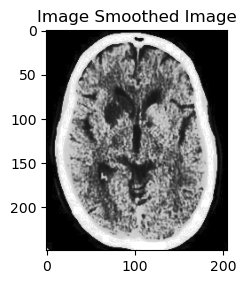

In [10]:
from skimage import exposure
p2, p98 = np.percentile(Im2, (2, 98))
image_stretched = exposure.rescale_intensity(Im2, in_range=(p2, p98))
plt.figure(figsize=(20, 20))
plt.subplot(6,1,1); plt.imshow(image_stretched, cmap = 'gray')
plt.title("Image Smoothed Image")

Text(0.5, 1.0, 'Image Smoothed Image')

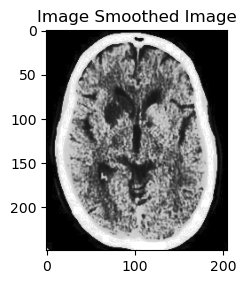

In [11]:
# Normalization
import cv2
image_normalized = cv2.normalize(image_stretched, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.figure(figsize=(20, 20))
plt.subplot(6,1,1); plt.imshow(image_normalized, cmap = 'gray')
plt.title("Image Smoothed Image")

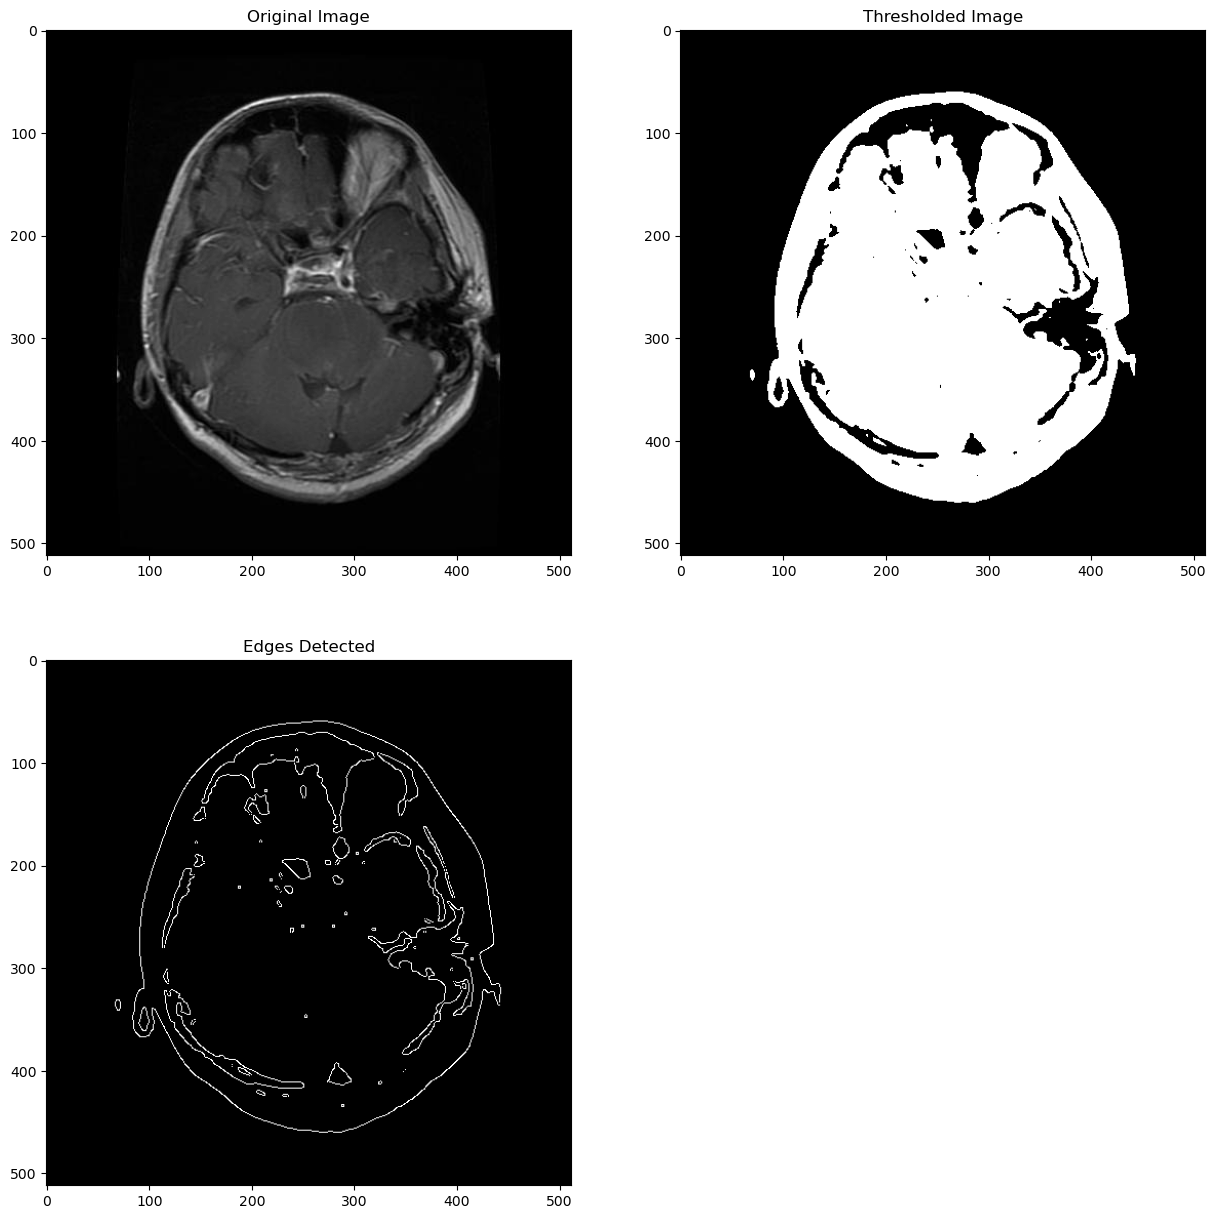

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2
from skimage import exposure

# Noise Reduction

image = cv2.imread('Data/Testing/glioma/Te-gl_0010.jpg', cv2.IMREAD_GRAYSCALE)
# image = cv2.imread('Data/Testing/notumor/Te-no_0010.jpg', cv2.IMREAD_GRAYSCALE)

# Now the rest of your pipeline will work
image_smoothed = cv2.GaussianBlur(image, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(image_smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Edge Detection
edges = cv2.Canny(thresh, 30, 100)

# Refinement (Optional)
# You can apply morphological operations like dilation or erosion to refine the edges if needed.
# Example: edges = cv2.dilate(edges, None, iterations=3)

# Displaying images
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")

plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected")

plt.show()